<img src="../img/Signet_FNW_1.svg" alt="OVGU_FNW_Logo" width="300" align="right">

# 2.4. DC circuits &amp; Kirchhoff' laws

The fun begins when you put everything together.
In this chapter, we will briefly introduce the basics of circuits and how to analyze them.



## 2.4.1 Circuits 101  

* electric circuit of consists elements/devices (batteries, capacitors, resistors, lightbulb etc.) which are connected via wires
* the circuit can be:
    * open, i.e. switched off or missing connection, and, therefore no current is flowing
    * complete/closed, i.e. switched on and current is flowing
    * short/short-circuited, having a faulty connection or device causing to much current flow (hazard)
* voltage source, i.e. battery, provides circuit with the voltage $V$ and causes a current $I$ to flow
* commonly, the circuit has a *ground*, i.e. connection to the Earth or a common conductor such as frame of a car
* the difference in potential at the two connections of an electric element is called a *voltage drop*
* each element/path in the circuit can be associated with a dedicated current and voltage
* elements can be in series or in parallel
* groups of elements can be summarized as equivalents to simplify a circuit

### Open-circuit voltage of a DC source
In essence, a *source* transforms on kind of energy (e.g. mechanical or chemical) into electric energy and delivers a potential difference/voltage.
We call the voltage the source provides without any current flowing, i.e. an open circuit, the *open-circuit voltage* $V_0$. 
Sometimes this voltage is also called the "emf" $\xi$ (greek lower-case xi) for electromotive force, but since there is no force, this is misleading and we stick with open-circuit voltage $V_0$
(to be very acuate, emf $\xi$ and open-circuit voltage $V_0$ are only equivalent if there are no leaking currents within the voltage source).
While real voltage sources, such as batteries, provide almost constant voltage, there are not a source of constant current.  
They have an internal resistance $R_{int}$ . 
Therefore, if a current is flowing the voltage $V$ provided by a voltage source will be:
$$ V = V_0 - I R_{int} $$

Note that the internal resistance can be non constant, i.e. $r_i$. 
In that case the *current–voltage characteristic* will be a non-linear function.
Characterizing the current–voltage dependency to understand real-life voltage sources as well as other elements of electric circuits such as batteries, photovoltaic cells, diodes.


### Measuring voltages and currents

To measure currents we use an *ampere meter*, or short, *ammeter*.
Ampere meter are inserted into the loop we want to measure the current in (i.e. put in series).
Voltages are measured with a *voltmeter*.
Voltmeters are put in parallel to the loop we want to measure the voltage in.
Further, there are *Ohmmeters* which can measure resistance.
Modern devices can switch between current, voltage, and resistance measurements and are called *multimeters*.

While modern, digital ampere meters and voltmeters are very precise, they still have an finite internal resistance which causes imperfections in the measurement.
Voltmeter have very high internal resistance. 
As the are in parallel to the circuit, the high internal resistance limits the current flowing through the voltmeter.
Ampere meters have very low internal resistance. 
As the are inserted into the circuit, the low internal resistance limits the voltage drop caused by the ampere meter.

If we want to measure voltage and current of e.g. a resistor simultaneously, we need to carefully design in which configuration we measure.
Option 1 is to measure the current correctly and measuring the voltage drop over the ampere meter and resistor with the voltmeter.
Option 2 is to measure the voltage correctly but measuring the current before it splits between voltmeter and resistor.
The proper choice of option 1 or 2 depends on the resistor we want to characterize, or more precisely, the ratio and associated error between resistor and the internal resistance of our measurement devices.

 <!--- todo: add symbol A / V-->



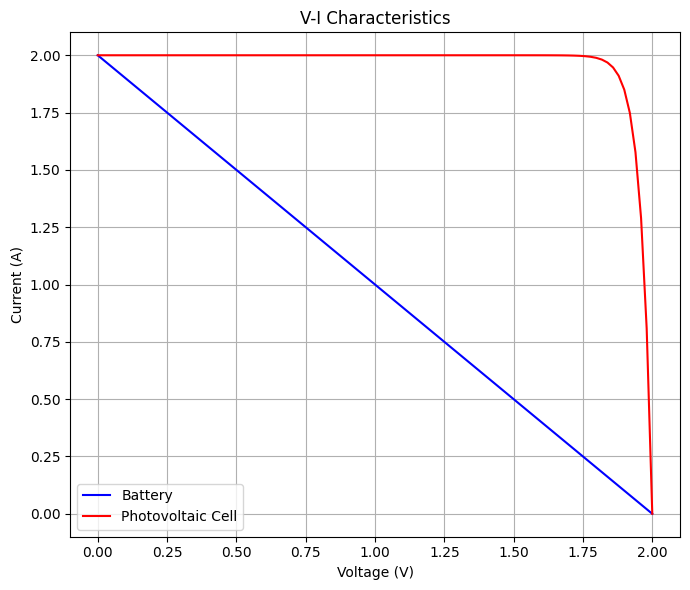

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define V-I characteristics

def battery_vi(voltage, internal_resistance, V_battery):
    return (V_battery - voltage) / internal_resistance

def photovoltaic_vi(voltage, I_sc, V_oc, n, V_t):
    return I_sc * (1 - np.exp((voltage - V_oc) / (n * V_t)))    
  
# Constants
V = np.linspace(0, 2, 100)  # Consistent voltage range for all elements
R_internal = 1  # Internal resistance of battery
V_battery = max(V)  # Battery voltage
V_oc = V_battery  # Open-circuit voltage for PV cell
I_sc = V_battery / R_internal  # Short-circuit current for PV cell
n = 1.5  # Ideality factor
V_t = 0.026  # Thermal voltage

fig, ax = plt.subplots(figsize=(7, 6))

I_battery = battery_vi(V, R_internal, V_battery)
ax.plot(V, I_battery, label='Battery', color='b')

I_pv = photovoltaic_vi(V, I_sc, V_oc, n, V_t)
ax.plot(V, I_pv, label='Photovoltaic Cell', color='r')

ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (A)')
ax.set_title('V-I Characteristics')
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()


## 2.4.2. Analysis circuits and Kirchhoff's Rules

### Resistors in series &amp; parallel 
The *equivalent* $R_{eq}$ of several resistors connected in series is simply found by adding all individual resistors.
This is because the voltage drop $V$ over all resistors is equal to the sum of the voltage drops $V_i$ of each individual resistor:
$$ V = \sum V_i = \sum I R_i = I \sum R_i = I R_{eq} $$
$$ R_{eq} = \sum R_i $$

Hence, we can imagine the individual resistors as pieces of a bigger *net resistance*.

If connected *parallel* to each other, the voltage drop per resistor is the same but the total current $I$ will split between the parallel resistors:
$$ I = \sum I_i  $$
$$ \frac{V}{R_{eq}} = \sum \frac{V}{R_i} = V\frac{1}{R_i}$$
with $V = RI \leftrightarrow I ={V}{R} $. 
Therefore, we can express the equivalent resistance of resistors in parallel as:
$$ \frac{1}{R_{eq}} = \frac{1}{R_i}$$

This means that the net resistance is smaller than the smallest individual resistance.
In a nutshell, resistors in parallel could be seen as building a resistor with a bigger cross-section $A$. 
Since $R = \rho \frac{l}{A}$, the resistance needs to decrease of parallel resistors.


### Capacitors in series &amp; parallel 

Capacitors in *parallel* have the same voltage drop, i.e. the plates connected to the negative terminal of the battery have the same potential and the same is true for the plates connected to the positive terminal.
Therefore, for each capacitor the respective charge $Q_i$ is $ Q_i = V C_i $ 
The total charge $Q$ is the sum of all individual charges $Q_i$ . 
We can represent the individual capacitors as an *equivalent* capacitance $ C_{eq} $:
$$ Q = V C_{eq} = V \sum C_i $$
$$ C_{eq} = \sum C_i $$

Therefore, capacitors in parallel can be summed to determine their net effect/equivalent capacitance $C_{eq}$.
Effectively, putting capacitors in parallel acts as "building a bigger capacitor" (similar to increasing the area of a capacitor).

Capacitors in *series* behave differently. 
While each capacitor will have a different voltage/potential difference $V = \sum V_i$ the charge associated with each capacitor will be the same.
If we imaging two capacitors in series connected to a battery, the most outer plates will be connected directly to the battery and, therefore, obtain a charge of $+Q$/$-Q$. The inner plates will "react" by "acquiring" the same magnitude of charge but with opposite sign.
The equivalent capacitance $C_{eq}$ can be estimated as:
$$ \frac{Q}{C_{eq}} = V = \sum V_i = Q \sum \frac{1}{C_i}$$

Therefore, capacitors in parallel can be determined as:
$$ \frac{1}{C_{eq}} = \sum \frac{1}{C_i}$$

As a consequence, $C_{eq}$ will always be smaller as the smallest $C_i$.

### Kirchhoff's rules
Named after Gustav Robert Kirchhoff (1824-1887), Kirchhoff's rules allow us to analyze complex circuits.

#### Junction rule
The first rule states that **at any junction point, the sum of all currents entering the junction must be equal to the sum of all currents leaving the junction**
$$ \sum_i I_i = 0 \quad \leftrightarrow \quad  \sum_j I_{in, j} = \sum_k I_{out, k}$$

Therefore, this rule is based on the *conservation of charges*.
What goes in, must come out.

#### Loop rule
The second rule states that **the sum of the changes in a potential around any closed loop of a circuit must be zero**
$$ \sum_i V_i = 0 $$

Therefore, this rule is based on the *conservation of energy*
If we start at a certain point in a circuit with the electric potential $V_x$, after going through a loop of a circuit and returning to the same point, we must be at the same electric potential $V_x$ at which we started.

#### Analyzing a circuit
You can apply Kirchhoff's rules to analyze an circuit by following the steps:
* labeling all currents
* identifying the unknowns
* applying the junction rule
* applying the loop rule
* solve system of equations

In principle, you can state the system of equations in vector/matrix form as well.
  



## 2.4.3. The RC-circuit

The simply circuit of an ideal voltage source $V_0$, an ideal resistor $R$, and an ideal capacitor $C$ in series is found in many electronics (e.g. to control windshield wiper or drive a heart pacemaker).
In most application, the RC-circuit is not used in a steady state, but rather switched on and off.
When switched on, the capacitor is charged.
When switched off, the capacitor is discharged.

Let's investigate both scenarios individually, before looking what happens if we switch on and off repeatedly.

#### Switching on to charge the capacitor
When the circuit is closed, the capacitor is charged.
This process is not instantaneous but takes a time.
To understand this process, lets start with Kirchhoff's loop rule. 
According to the loop rule, the voltage provided by the source $V_0$ will be equal to the voltage drops over the resistor and capacitor.
For the resistor, the voltage drop is $V_R = I R$.
For the capacitor, the voltage depends on $ Q = V_C C \leftrightarrow V_C = \frac{Q}{C} $ .
$$ V_0 = V_R + V_C = I R + \frac{Q}{C} $$

We need consider that the charge on the capacitor is changing over time.
Therefore, the current, which is defined as $I = \frac{dQ}{dt} $, changes as well.

$$ V_0 = R \frac{dQ}{dt} + \frac{1}{C} Q $$

Eventually, the capacitor is fully charged.
Therefore, the voltage at the capacitor $V_C$ equals the source voltage $V_0$.
As consequence, there is no voltage drop over the resistor and, therefore, no current is flowing $V_R = 0 \rightarrow I = 0$.

To solve the first-order linear ordinary differential equation we do the following:
* separate $dQ$ &amp; $Q$ from $dt$
$$ V_0 C = R C \frac{dQ}{dt} + Q $$
$$ \frac{V_0 C - Q}{RC} = \frac{dQ}{dt} $$
$$ \frac{dt}{RC} = \frac{dQ}{V_0 C - Q} $$
* integrate from $t=0$ &amp; $Q=0$ until fully charged 
$$ \frac{1}{RC} \int_0^t dt = \int_0^Q \frac{dQ}{V_0 C - Q} $$
$$ \frac{1}{RC} t |_0^t = -\ln(V_0 C - Q) |_0^Q$$
$$ \frac{1}{RC} t = -\ln(V_0 C - Q) - (- \ln(V_0 C)) $$
$$ \frac{1}{RC} t = -\ln(V_0 C - Q) + \ln(V_0 C)) $$
$$ -\frac{1}{RC} t = \ln(V_0 C - Q) - ln({V_0 C})  $$
$$ -\frac{1}{RC} t = \ln(\frac{V_0 C - Q}{V_0 C})  $$
$$ -\frac{1}{RC} t = \ln(1 - \frac{Q}{V_0 C}) $$
* take the exponential
$$ 1 - \frac{Q}{V_0 C} = e^{-\frac{t}{RC}} $$
* by defining the maximum charge $Q_0 = V_0 C$, we obtain the time-dependent charge $Q(t)$:
$$ Q(t) = Q_0 (1 - e^{-\frac{t}{RC}}) $$
* to obtain the time-dependent capacitor voltage $V_C$ and current $I$ we leverage:
$$ V_C(t) = \frac{Q}{C} = V_0(1 - e^{-\frac{t}{RC}}) = = V_0(1 - e^{-\frac{t}{\tau}}) $$
$$ I(t) = \frac{dQ}{dt} = \frac{V_0}{R} e^{-\frac{t}{RC}} = \frac{V_0}{R} e^{-\frac{t}{\tau}} $$

Interestingly, the unit of $RC$ is seconds ($\Omega$/F = (V/A) / (C/V) = (C) / (A) = C / (C/s) = s).
We define $\tau = RC$ as the time constant of the RC-circuit, representing how fast the capacitor voltage increase and current decays.
It takes $\tau$ for the voltage to reach 63% of its maximum amplitude.
Consequently, after $\tau$ the current has decayed to 37% of its initial value.
While the equations suggest, that $V_C(t)$ and $I$ never reach their final value, it is fair to assume that after $5\tau$ the process of charging is completed.


#### Switching off to discharge the capacitor
The same logic as for charging can be applied when studying how the capacitor discharges.
Note that for discharging the battery is removed from the closed circuit.

Applying Kirchhoff's loop rule yields:
$$ V_R = V_C $$
$$ I R = Q /C $$

As before the current depends on the charge over time, but this time with opposite sign due to the inverted direction of flow $I = -\frac{dQ}{dt} $:
$$ - \frac{dQ}{dt} R = \frac{Q}{C}$$
We do the following to solve this equation:
* separate $dQ$ &amp; $Q$ from $dt$
$$ \frac{dQ}{Q} = - \frac{dt}{RC}$$
* integrate from $t=0$ &amp; $Q_0$ to some time $t$ with residual charge $Q$
$$ \int_{Q_0}^Q \frac{1}{Q} dQ  = - \frac{1}{RC} \int_0^t dt $$
$$ \ln(Q) - \ln(Q_0)  = - \frac{t}{RC} $$
$$ \ln(\frac{Q}{Q_0})  = - \frac{t}{RC} $$
* take the exponential
$$ Q = Q_0 e^{-\frac{t}{RC}} $$
* therefore, the capacitor voltage $V_C$ and current $I$ are:
$$ V_C(t) = \frac{Q}{C} = V_0 e^{-\frac{t}{RC}} = V_0 e^{-\frac{t}{\tau}} $$
$$ I(t) = - \frac{dQ}{dt} = -\frac{Q_0}{-RC} e^{-\frac{t}{RC}} = \frac{Q_0}{\tau} e^{-\frac{t}{RC}} =I_0 e^{-\frac{t}{RC}} =I_0 e^{-\frac{t}{\tau}}$$

Note that voltage and current are decaying over time. 

#### Periodically switching on-off
By periodically switching a RC-circuit, we can create a *sawtooth voltage*.
In practice, this involves a voltage source, an capacitor, two resistors, and a tube.
One loop is battery, resistor, capacitor and used for charging.
The other loop is built with the other resistor, capacitor and the tube.
The tube only become conducting when a certain breakdown voltage is reached. 
Once conducting, the tube acts as a *short* and discharges the capacitor until the tube stops conducting (minimal voltage).
Then, the capacitor is charged again until the tube reaches its breakdown voltage and the cycle repeats.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Global constants
R_MIN, R_MAX = 1000, 10000  # Resistance range (Ohms)
C_MIN, C_MAX = 1e-6, 1e-3  # Capacitance range (Farads)
V0 = 10  # Initial voltage (Volts)
TIME_STEPS = 1000  # Number of time steps
I_MAX = V0 / R_MIN  # Maximum current

def simulate_rc_wave(R, C, V_LOW, V_HIGH, T_MAX):
    time = np.linspace(0, T_MAX, TIME_STEPS)
    tau = R * C  # Time constant
    voltage = []
    current = []
    v_cap = V_LOW  # Start at the lower threshold
    charging = True
    
    for t in time:
        if charging:
            v_cap += (V0 - v_cap) * (1 - np.exp(-1 / (TIME_STEPS / T_MAX) / tau))
            if v_cap >= V_HIGH:
                charging = False
        else:
            v_cap *= np.exp(-1 / (TIME_STEPS / T_MAX) / tau)
            if v_cap <= V_LOW:
                charging = True
        voltage.append(v_cap)
        current.append((V0 - v_cap) / R if charging else -v_cap / R)
    
    fig, ax1 = plt.subplots(figsize=(8, 5))
    fig.patch.set_facecolor('black')
    ax1.set_facecolor('black')
    ax1.tick_params(colors='white')
    ax1.spines['bottom'].set_color('white')
    ax1.spines['top'].set_color('white')
    ax1.spines['left'].set_color('white')
    ax1.spines['right'].set_color('white')
    
    ax1.plot(time, voltage, 'c', label='Capacitor Voltage')
    ax1.set_xlabel('Time (s)', color='white')
    ax1.set_ylabel('Voltage (V)', color='white')
    ax1.set_ylim(0, V0)
    ax1.axhline(V_LOW, color='r', linestyle='--', label='Lower Threshold')
    ax1.axhline(V_HIGH, color='g', linestyle='--', label='Upper Threshold')
    
    ax2 = ax1.twinx()
    ax2.tick_params(colors='white')
    ax2.plot(time, current, 'm', linestyle='dashed', label='Current (A)')
    ax2.set_ylabel('Current (A)', color='white')
    ax2.set_ylim(-I_MAX, I_MAX)  # Set y-axis limits to -I_max to +I_max
    
    ax1.set_title(f'RC Circuit - Oscillating Voltage (RC = {tau:.3f} s)', color='white')
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper left')
    
    plt.show()

interact(simulate_rc_wave, 
         R=widgets.FloatLogSlider(value=R_MAX, min=np.log10(R_MIN), max=np.log10(R_MAX), step=0.1, description='Resistance (Ω)'),
         C=widgets.FloatLogSlider(value=C_MAX, min=np.log10(C_MIN), max=np.log10(C_MAX), step=0.1, description='Capacitance (F)'),
         V_LOW=widgets.FloatSlider(value=0.0, min=0.0, max=4.5, step=0.1, description='Lower Threshold (V)'),
         V_HIGH=widgets.FloatSlider(value=V0, min=5.5, max=V0, step=0.1, description='Upper Threshold (V)'),
         T_MAX=widgets.FloatSlider(value=5*R_MAX*C_MAX, min=1, max=100, step=1, description='Time (s)'))


interactive(children=(FloatLogSlider(value=10000.0, description='Resistance (Ω)', min=3.0), FloatLogSlider(val…

<function __main__.simulate_rc_wave(R, C, V_LOW, V_HIGH, T_MAX)>